In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#To open csv in Jupyter, I had to resave the CSV as UTF-8 csv
wellcome = pd.read_csv('WELLCOME_2013_forThinkful.csv')

#Look at first 5 rows of data
wellcome.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [3]:
#Renamed columns to make them more usable
wellcome.rename(columns={'Journal title': 'Journal_title', 'Article title': 'Article_title','COST (£) charged to Wellcome (inc VAT when charged)':'Sterling'}, inplace=True)
wellcome.head()

,PMID/PMCID,Publisher,Journal_title,Article_title,Sterling
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [4]:
#Initial ideas:
#Rename columns -
#Find missing values -
#Standardize Publisher and Journal titles -
#Remove duplicate rows -
#Convert Sterling to float -

In [5]:
wellcome.shape

(2127, 5)

In [6]:
#Number of data types
wellcome.get_dtype_counts()

object    5
dtype: int64

In [7]:
#Find missing values and how they are distributed in the dataframe
wellcome.isnull().sum()

PMID/PMCID       199
Publisher          0
Journal_title      1
Article_title      0
Sterling           0
dtype: int64

In [8]:
#Not really worried about missing values for PMID/PMCID.  We won't use this ID at all. Can be used to find duplicate
#rows, but we can find them other ways
null_data = wellcome[wellcome.isnull().any(axis=1)]
null_data.head()

,PMID/PMCID,Publisher,Journal_title,Article_title,Sterling
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
21,NaN,American Chemical Society,ACS Chemical Biology,Discovery of ?2 Adrenergic Receptor Ligands Us...,£947.07
43,NaN,American Psychiatric Association,American Journal of Psychiatry,Methamphetamine-induced disruption of frontost...,£2351.73
93,NaN,American Society for Microbiology,Journal of Virology,The human adenovirus type 5 L4 promoter is act...,£1312.59
100,NaN,American Society for Nutrition,American Society for Nutrition,The association between breastfeeding and HIV ...,£45.94


In [9]:
#Want to find the missing row in Journal_title
null_columns=wellcome.columns[wellcome.isnull().any()]
wellcome[wellcome.Journal_title.isnull()][null_columns]

,PMID/PMCID,Journal_title
986,NaN,NaN


In [10]:
#Now that we know the location of the missing value in the Journal_title column, let's pull up this row and a few rows before
#and after it
wellcome.iloc[983:989,:]

,PMID/PMCID,Publisher,Journal_title,Article_title,Sterling
983,PMCID: PMC3594270,Landes Biosciences,Cell Cycle,ATM-dependent phosphorylation of heterogeneous...,£762.88
984,PMCID: PMC3637335,Landes Biosciences,Cell Cycle,Dma/RNF8 proteins are evolutionarily conserved...,£804.61
985,NaN,LWW,Neurology,The pattern of atrophy in familial Alzheimer d...,£2504.36
986,NaN,MacMillan,NaN,Fungal Disease in Britain and the United State...,£13200.00
987,PMC3526897,Mary Ann Liebert,Antioxidants & Redox Signaling,Oxidation of the Yeast Mitochondrial Thioredox...,£1347.79
988,PMID:23706023,Mary Ann Liebert,Antioxidants and Redox Signaling,Ybp1 and Gpx3 signalling in Candida albicans g...,£1681.94


In [11]:
#Since I have no idea what Journal this Article is from, I'm going to drop the row with NaN under Journal_title
wellcome = wellcome.drop(wellcome.index[986])
wellcome.head()

,PMID/PMCID,Publisher,Journal_title,Article_title,Sterling
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [12]:
#Check to make sure it's dropped and it is
wellcome.loc[983:989,:]

,PMID/PMCID,Publisher,Journal_title,Article_title,Sterling
983,PMCID: PMC3594270,Landes Biosciences,Cell Cycle,ATM-dependent phosphorylation of heterogeneous...,£762.88
984,PMCID: PMC3637335,Landes Biosciences,Cell Cycle,Dma/RNF8 proteins are evolutionarily conserved...,£804.61
985,NaN,LWW,Neurology,The pattern of atrophy in familial Alzheimer d...,£2504.36
987,PMC3526897,Mary Ann Liebert,Antioxidants & Redox Signaling,Oxidation of the Yeast Mitochondrial Thioredox...,£1347.79
988,PMID:23706023,Mary Ann Liebert,Antioxidants and Redox Signaling,Ybp1 and Gpx3 signalling in Candida albicans g...,£1681.94
989,PMCID:\n PMC3761558,Mary Ann Liebert,Tissue Engineering: part A,Effects of Fiber Orientation on teh Frictional...,£1741.32


In [13]:
#Want to see what datatypes each column is
wellcome.dtypes

PMID/PMCID       object
Publisher        object
Journal_title    object
Article_title    object
Sterling         object
dtype: object

In [14]:
#Trying out this function from the lesson
def is_a_string(x):
    return str(x).isdigit()
wellcome.apply(is_a_string) #After running this, there are no strings that are all digits in this dataset

PMID/PMCID       False
Publisher        False
Journal_title    False
Article_title    False
Sterling         False
dtype: bool

In [15]:
#Convert Sterling into float
wellcome.Sterling = wellcome.Sterling.str.replace('£','')
wellcome.Sterling = wellcome.Sterling.convert_objects(convert_numeric=True)
wellcome.head()

c:\users\ashley menante\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


,PMID/PMCID,Publisher,Journal_title,Article_title,Sterling
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,685.88


In [16]:
wellcome.dtypes

PMID/PMCID        object
Publisher         object
Journal_title     object
Article_title     object
Sterling         float64
dtype: object

In [17]:
wellcome.shape

(2126, 5)

In [18]:
#Understand Sterling column further
wellcome.Sterling.describe()

count      2113.000000
mean      24211.650809
std      147335.665670
min           0.000000
25%        1280.000000
50%        1889.900000
75%        2321.550000
max      999999.000000
Name: Sterling, dtype: float64

c:\users\ashley menante\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\ashley menante\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


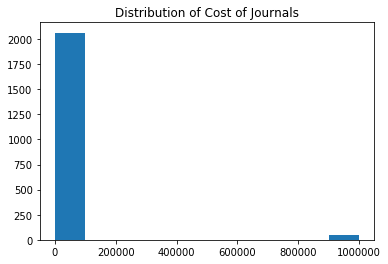

In [19]:
#Create histogram to see how the prices are distributed and explore any potential problems
x = wellcome.Sterling
plt.hist(x)
plt.title('Distribution of Cost of Journals')
plt.show()

In [20]:
#Since there is an extreme outlier in the Sterling column, I am going to explore that further to see if it makes sense
wellcome.loc[wellcome.Sterling > 4000]

,PMID/PMCID,Publisher,Journal_title,Article_title,Sterling
149,PMC3234811,ASBMB,Journal of Biological Chemistry,Picomolar nitric oxide signals from central ne...,999999.00
227,3708772,BioMed Central,BMC Genomics.,"Phenotypic, genomic, and transcriptional chara...",999999.00
277,PMC3668259,BMC,Trials,Community resource centres to improve the heal...,999999.00
358,PMC3219211,Cambridge University Press,Expert Reviews in Molecular Medicine,Pharmacological targets in the ubiquitin syste...,999999.00
404,PMC3533396,Company of Biologists,Journal of Cell Science,PKA isoforms coordinate mRNA fate during nutri...,999999.00
410,NaN,CUP,Journal of the International African Institute,"Pharmacy, money and public health in Dakar.",999999.00
490,PMC3650559,Elsevier,Cell,Mapping the human miRNA interactome by CLASH r...,4163.88
491,PMCID: PMC3464430,Elsevier,Cell,piRNAs can trigger a multigenerational epigene...,999999.00
494,PMCID: PMC3661979,Elsevier,Cell Journal,Exit from Pluripotency is Gated by Intracellul...,4041.05
525,PMC3661981,Elsevier,Current Biology,Locomotion Controls Spatial Integration in Mou...,4077.52


In [21]:
#Remove rows with 999999.00
#Shift decimals for the other ones
wellcome.replace(201024.00, 2010.24, inplace=True)
wellcome.replace(192645.00, 1926.45, inplace=True)
wellcome = wellcome.drop(wellcome[wellcome['Sterling']==999999.00].index)
wellcome.loc[wellcome.Sterling > 4000]

,PMID/PMCID,Publisher,Journal_title,Article_title,Sterling
490,PMC3650559,Elsevier,Cell,Mapping the human miRNA interactome by CLASH r...,4163.88
494,PMCID: PMC3661979,Elsevier,Cell Journal,Exit from Pluripotency is Gated by Intracellul...,4041.05
525,PMC3661981,Elsevier,Current Biology,Locomotion Controls Spatial Integration in Mou...,4077.52
526,NaN,Elsevier,Current Biology,A fovea for pain at the fingertips,4112.54
540,PMC3730058,Elsevier,Developmental Cell,Daughter cell identity emerges from the interp...,4002.42
541,PMC3659288\n\n,Elsevier,Developmental Cell,Hec1-dependent cyclin B2 stabilisation regulat...,4076.38
542,3605578,Elsevier,Developmental Cell,Syndecan-4 phosphorylation is a control point ...,4099.71
552,23541370 PMC3744751,Elsevier,Elsevier,Effects of relative weight gain and linear gro...,4800.00
587,PMCID: PMC3664922\n,Elsevier,Immunity,Dysregulated Hematopoietic Stem and Progenitor...,4069.66
648,NaN,Elsevier,Lancet,Global trends in antiretroviral resistance in ...,4800.00


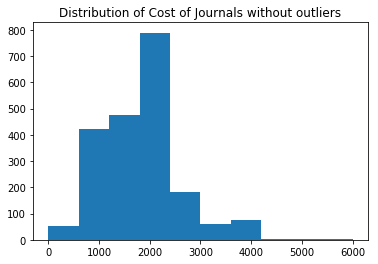

In [22]:
#Now that I've changed and dropped certain values, I want to replot the data in the histogram to look at the distribution 
#without the extreme outliers -- this distribution looks a lot better wo the outliers, no glaring errors/problems with values
x = wellcome.Sterling
plt.hist(x)
plt.title('Distribution of Cost of Journals without outliers')
plt.show()

In [23]:
#Now I want to do some text manipulation to standardized the Publishers and Journal titles
#Convert string to lower case, remove leading and trailing whitespace, and removing extraneous characters
wellcome.Journal_title = wellcome.Journal_title.apply(lambda x: x.lower())
wellcome.Journal_title = wellcome.Journal_title.str.strip()
wellcome.Publisher = wellcome.Publisher.apply(lambda x: x.lower())
wellcome.Publisher = wellcome.Publisher.str.strip()
wellcome.Publisher = wellcome.Publisher.replace(' \n', '')
wellcome.head()

,PMID/PMCID,Publisher,Journal_title,Article_title,Sterling
0,NaN,cup,psychological medicine,Reduced parahippocampal cortical thickness in ...,0.00
1,PMC3679557,acs,biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04
2,23043264 PMC3506128,acs,j med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,23438330 PMC3646402,acs,j med chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64
4,23438216 PMC3601604,acs,j org chem,Regioselective opening of myo-inositol orthoes...,685.88


In [24]:
#going through each column to get a feel for what's there
#In Publisher column, there are diff variations of the same publishers
wellcome['Publisher'].unique()

array(['cup', 'acs', 'acs (amercian chemical society) publications',
       'acs publications', 'aga institute', 'ambsb',
       'american association of immunologists',
       'american chemical society',
       'american chemical society publications',
       'american college of chest physicians',
       'american physiological society',
       'american psychiatric association',
       'american psychiatric publishing',
       'american psychological association',
       'american public health association',
       'american soc for biochemistry and molecular biology',
       'american society for biochemistry and molecular biolgy',
       'american society for biochemistry and molecular biology',
       'american society for investigative pathology',
       'american society for microbiology',
       'american society for nutrition',
       'american society of haematology',
       'american society of hamatology', 'american society of hematology',
       'american society of huma

In [25]:
#Standardizing Publishers by creating lists of different versions of publishers and then replacing them with the standard title
acs = ['acs', 'acs (american chemical society) publications', 'acs publications', 'american chemical society publications', 'acs (amercian chemical society) publications']
soc_biochem_mol = ['american soc for biochemistry and molecular biology', 'the american society for biochemistry and molecular biology','american society for biochemistry and molecular biolgy']
hematology = ['american society of haematology', 'american society of hamatology']
microbiology = ['american society of microbiology', 'asm', 'asm (american society for microbiology)']
brit_med = ['bmj', 'bmj group','bmj journals', 'bmj publishing group', 'bmj publishing group ltd']
cam = ['cambridge journals','cambridge uni press', 'cambridge univ press']
cold_harbor = ['cold spring harbor','cold spring harbor laboratory press','cold spring harbor publications', 'cold spring habour press']
dartmouth = ['darmouth journal services','dartmouth journals']
elsevier = ['elseveier science', 'elsevier (cell press)', 'elsevier / cell science','elsevier b.v.', 'elsevier ltd', 'elsevier/cell press']
faseb = ['faseb','federation of american societies for experimental biology (faseb)']
wiley = ['john wiley','john wiley & sons inc', 'john wiley & sons ltd','john wiley & sons, inc.', 'john wiley and sons','john wiley and sons ltd']
nat_academy_science= [ 'national academy of sciences','national academy of sciences of the united states of america','national academy of sciences, usa']
nature = ['nature', 'nature pg','nature publishing group','nature publishing group ltd', 'npg']
oxford = ['oup','oxford journals', 'oxford journals (oup)', 'oxford univ press','oxford university press (oup)','oxford univesity press']
plos = ['plos','plos (public library of science)','plos public library of science']
pnas = ['pnas', 'pnas author publication','proceedings of the national academy of sciences (pnas)']
sage = ['sage','sage publications inc', 'sage publications ltd','sage publishers']
springer = ['springer - verlag gmbh','springer-veriag gmbh', 'springer-verlag gmbh','springer-verlag gmbh & ci','springer-verlag gmbh, heidelberger platz 3, d-14197 berlin']
wiley = ['wiley subscription services', 'wiley subscription services  inc.','wiley subscription serviices inc']
wellcome.Publisher = wellcome.Publisher.replace(acs,'american chemical society')
wellcome.Publisher = wellcome.Publisher.replace(soc_biochem_mol, 'american society for biochemistry and molecular biology')
wellcome.Publisher = wellcome.Publisher.replace(hematology, 'american society of hematology')
wellcome.Publisher = wellcome.Publisher.replace(microbiology, 'american society for microbiology')
wellcome.Publisher = wellcome.Publisher.replace(brit_med, 'british medical journal')
wellcome.Publisher = wellcome.Publisher.replace(cam, 'cambridge university press')
wellcome.Publisher = wellcome.Publisher.replace(cold_harbor, 'cold spring harbor press')
wellcome.Publisher = wellcome.Publisher.replace(dartmouth, 'dartmouth journal services')
wellcome.Publisher = wellcome.Publisher.replace(elsevier, 'elsevier')
wellcome.Publisher = wellcome.Publisher.replace(faseb, 'federation of american societies for experimental biology')
wellcome.Publisher = wellcome.Publisher.replace(wiley, 'john wiley & sons')
wellcome.Publisher = wellcome.Publisher.replace(nat_academy_science,'national academy of sciences usa')
wellcome.Publisher = wellcome.Publisher.replace(nature, 'nature publishing')
wellcome.Publisher = wellcome.Publisher.replace(oxford,'oxford university press')
wellcome.Publisher = wellcome.Publisher.replace(plos, 'public library of science')
wellcome.Publisher = wellcome.Publisher.replace(pnas, 'proceedings of the national academy of sciences')        
wellcome.Publisher = wellcome.Publisher.replace(sage,'sage publications')
wellcome.Publisher = wellcome.Publisher.replace(springer, 'springer verlag')
wellcome.Publisher = wellcome.Publisher.replace(wiley, 'wiley subscription services inc')
wellcome.Publisher.unique()

array(['cup', 'american chemical society', 'aga institute', 'ambsb',
       'american association of immunologists',
       'american college of chest physicians',
       'american physiological society',
       'american psychiatric association',
       'american psychiatric publishing',
       'american psychological association',
       'american public health association',
       'american society for biochemistry and molecular biology',
       'american society for investigative pathology',
       'american society for microbiology',
       'american society for nutrition', 'american society of hematology',
       'american society of human genetics (elsevier)',
       'american speech-language-hearing association', 'asbmb',
       'asbmb cadmus', 'asbmb/cadmus', 'asbmb/cenveo publisher services',
       'asbmc /cenveo',
       'association for research in vision & ophthalmology',
       'bentham science publishers', 'benthan science publishers',
       'berhahn books', 'biochem j

In [26]:
#There are diff variations of the same Journal Titles
aids = ['jaids journal of acquired immune deficiency syndromes', 'journal of acquired immune deficiency syndroms (jaids)','aids journal', 'journal of aids', 'circulation research', 'pediatr infect dis j']
bio_chem = ['biological chemistry', 'jnl biological chemistry','journal biological chemistry', 'journal of biol chem','biologicial chemistry', 'j biol chemistry', 'biochem journal']
chem = ['journal of the american chemical society']
clinical_nut = ['american journal of clinical nutrition',]
history_science = ['british journal of the history of science']
med_chem = ['j med chem']
opt = ['bjophthalmol', 'british journal of ophthalmology']
epid = ['international joural of epidemiology', 'inyernational journal of epidemiology']
natl_sciences = ['proceedings of the national academy of sciences of the usa','proc natl acad sci u s a.', 'proceedings of the national academy of sciences (pnas)', 'national academy of sciences']
plos_one = ['plos 1', 'plosone']
autism = ['journal of autism and development disorders']
wellcome.Journal_title = wellcome.Journal_title.replace(aids, 'journal of acquired immune deficiency syndromes')
wellcome.Journal_title = wellcome.Journal_title.replace(bio_chem, 'journal of biological chemistry')
wellcome.Journal_title = wellcome.Journal_title.replace(chem, 'american chemical society')
wellcome.Journal_title = wellcome.Journal_title.replace(clinical_nut,'american journal for clinical nutrition')
wellcome.Journal_title = wellcome.Journal_title.replace(history_science, 'british journal for the history of science')
wellcome.Journal_title = wellcome.Journal_title.replace(med_chem, 'journal of medicinal chemistry')
wellcome.Journal_title = wellcome.Journal_title.replace(opt, 'british journal of opthalmology')
wellcome.Journal_title = wellcome.Journal_title.replace(epid, 'international journal of epidemiology')
wellcome.Journal_title = wellcome.Journal_title.replace(natl_sciences, 'proceedings of the national academy of sciences')
wellcome.Journal_title = wellcome.Journal_title.replace(plos_one, 'plos one')
wellcome.Journal_title = wellcome.Journal_title.replace(autism, 'journal of autism and developmental disorders')
wellcome.Journal_title.unique()

array(['psychological medicine', 'biomacromolecules',
       'journal of medicinal chemistry', 'j org chem',
       'journal of proteome research', 'mol pharm',
       'acs chemical biology',
       'journal of chemical information and modeling', 'biochemistry',
       'gastroenterology', 'journal of biological chemistry',
       'journal of immunology', 'acs chemical neuroscience', 'acs nano',
       'american chemical society', 'analytical chemistry',
       'bioconjugate chemistry', 'chest', 'journal of neurophysiology',
       'journal of physiology', 'the journal of neurophysiology',
       'american journal of psychiatry', 'americal journal of psychiatry',
       'behavioral neuroscience', 'emotion', 'health psychology',
       'journal of abnormal psychology',
       'journal of consulting and clinical psychology',
       'journal of experimental psychology:  animal behaviour process',
       'journal of experimental psychology: human perception and performance',
       'journal

In [27]:
#Looking for any duplicate rows in dataset -- no duplicates found
duplicateRowsDF = wellcome[wellcome.duplicated()]
duplicateRowsDF

,PMID/PMCID,Publisher,Journal_title,Article_title,Sterling


In [28]:
#To complete this challenge, determine the five most common journals and the total articles for each.
wellcome.groupby('Journal_title')['Article_title'].count().sort_values(ascending=False)[:5]

Journal_title
plos one                                           198
journal of biological chemistry                     60
neuroimage                                          29
proceedings of the national academy of sciences     28
nucleic acids research                              26
Name: Article_title, dtype: int64

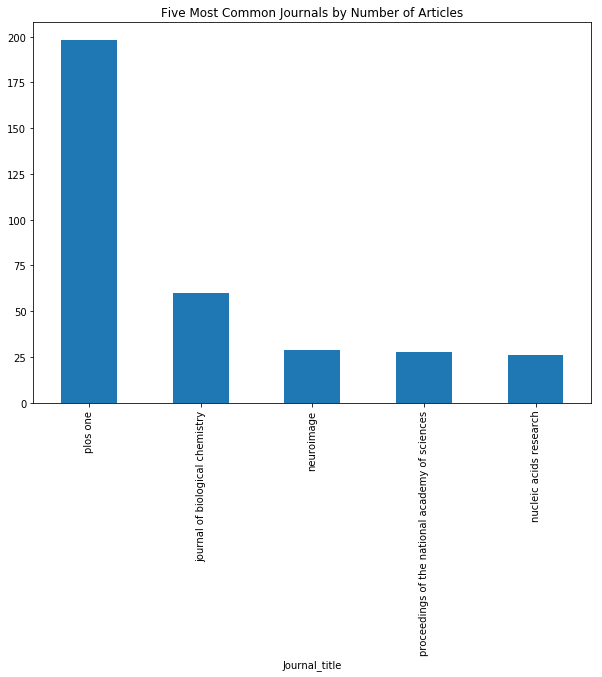

In [29]:
#Plot top five journal titles
fig, ax = plt.subplots(figsize=(10,7))
wellcome.groupby('Journal_title')['Article_title'].count().sort_values(ascending=False)[:5].plot(kind='bar')
plt.title('Five Most Common Journals by Number of Articles')
plt.show()

In [30]:
#Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal.
#plos
plos = wellcome.loc[wellcome.Journal_title == 'plos one']
plos.head(5)

,PMID/PMCID,Publisher,Journal_title,Article_title,Sterling
1282,3517619,public library of science,plos one,HCN1 and HCN2 in Rat DRG Neurons: Levels in No...,1001.03
1283,3498109,public library of science,plos one,Fetal alcohol exposure and IQ at age 8: Eviden...,1004.15
1284,3515553,public library of science,plos one,Vitamin B-12 status during pregnancy and child...,1011.45
1285,3522679,public library of science,plos one,Validation of Dual Energy X-ray Absorptiometry...,1011.45
1286,3485223,public library of science,plos one,Associations of different phenotypes of wheezi...,1015.73


In [31]:
plos.describe() #Mean: 940.42, std: 207.21, median: 897.09

,Sterling
count,198.000000
mean,940.416212
std,207.209586
min,122.310000
25%,851.267500
50%,897.090000
75%,1040.577500
max,1926.450000


In [32]:
#journal of biological chemistry
jour_biochem = wellcome.loc[wellcome.Journal_title == 'journal of biological chemistry']
jour_biochem.head(5)

,PMID/PMCID,Publisher,Journal_title,Article_title,Sterling
16,22610094,ambsb,journal of biological chemistry,Annexin-1 interaction with FPR2/ALX,265.67
60,PMC3576085,american society for biochemistry and molecula...,journal of biological chemistry,Understanding how noncatalytic carbohydrate bi...,1100.00
61,23239883 PMC3561570,american society for biochemistry and molecula...,journal of biological chemistry,Molecular architecture and functional analysis...,2259.64
64,PMCID: PMC3642348,american society for biochemistry and molecula...,journal of biological chemistry,Human and viral golgi anti-apoptotic protein (...,1019.71
65,PMID: 22992744 PMC3493908,american society for biochemistry and molecula...,journal of biological chemistry,Dynamic exchange of myosin VI on endocytic str...,1119.61


In [33]:
jour_biochem.describe() #Mean: 1379.98, std: 422.81, median:1284.23

,Sterling
count,60.000000
mean,1379.979333
std,422.805713
min,265.670000
25%,1133.627500
50%,1284.225000
75%,1602.602500
max,2501.070000


In [34]:
#neuroimage
neuroimage = wellcome.loc[wellcome.Journal_title == 'neuroimage']
neuroimage.head(5)

,PMID/PMCID,Publisher,Journal_title,Article_title,Sterling
437,23672768,elsevier,neuroimage,Gearing up for action: attentive tracking dyna...,1758.89
438,23046981,elsevier,neuroimage,Good practice for conducting and reporting MEG...,2345.00
689,PMC3734349\n,elsevier,neuroimage,Connectivity-based neurofeedback: dynamic caus...,1747.16
690,PMC3734350\n,elsevier,neuroimage,The impact of distractor congruency on stimulu...,1760.94
691,PMC3734351\n,elsevier,neuroimage,Distinct encoding of risk and value in economi...,1762.69


In [35]:
neuroimage.describe() #Mean: 2215.17, std: 266.65, median: 2326.43

,Sterling
count,29.000000
mean,2215.168276
std,266.653947
min,1747.160000
25%,2100.540000
50%,2326.430000
75%,2396.570000
max,2503.340000


In [36]:
#proceedings of the national academy of sciences
natl_academy = wellcome.loc[wellcome.Journal_title == 'proceedings of the national academy of sciences']
natl_academy.head()

,PMID/PMCID,Publisher,Journal_title,Article_title,Sterling
429,2766312,dartmouth journal services,proceedings of the national academy of sciences,Analysis of Synthetic Lethality Reveals Geneti...,1241.10
430,PMC3511132,dartmouth journal services,proceedings of the national academy of sciences,SGTA antagonizes BAG6-mediated protein triage,603.42
431,3704016,dartmouth journal services,proceedings of the national academy of sciences,Inositol kinase and its product accelerate wou...,660.59
960,PMID23213218 PMC3529057,journal of the american physiological proceedi...,proceedings of the national academy of sciences,Morphing between expressions dissociates conti...,1052.99
1005,PMCID:\n PMC3670340\n,national academy of sciences usa,proceedings of the national academy of sciences,Systematic identification of conserved bacteri...,395.60


In [37]:
natl_academy.describe() #Mean: 883.89, std: 525.40, median: 762.33

,Sterling
count,28.000000
mean,883.896786
std,525.404952
min,206.320000
25%,661.715000
50%,762.330000
75%,814.987500
max,2691.680000


In [38]:
#nucleic acids research
nucleic_acids = wellcome.loc[wellcome.Journal_title == 'nucleic acids research']
nucleic_acids.head()

,PMID/PMCID,Publisher,Journal_title,Article_title,Sterling
1148,23595147 PMCID: PMC3675483,oxford university press,nucleic acids research,Nucleocapsid protein structures from orthobuny...,1704.0
1149,PMID: 23771140 /PMCID: PMC3753647,oxford university press,nucleic acids research,Impact of Target Site Distribution for Type I ...,2184.0
1150,3467080,oxford university press,nucleic acids research,Protein kinase CK2 inactivates PRH/Hhex using ...,852.0
1151,3553950,oxford university press,nucleic acids research,The Type ISP Restriction-Modification enzymes ...,852.0
1152,3553963,oxford university press,nucleic acids research,DNA cleavage by Type ISP Restriction-Modificat...,852.0


In [39]:
nucleic_acids.describe() #Mean: 1149.00, std: 442.94, median: 852.00

,Sterling
count,26.000000
mean,1149.000000
std,442.940447
min,710.000000
25%,852.000000
50%,852.000000
75%,1704.000000
max,2184.000000
